In [1]:
%matplotlib inline  

In [2]:
import pyspark_cassandra
from pyspark.sql import SQLContext
sql = SQLContext(sc)

In [3]:
tab = sc.cassandraTable("labor", "average_price_data_current")

In [4]:
# we have to kick up the sample ratio because for whatever reason, only using the first row gives us errors
apd = tab.toDF(sampleRatio=.1)

In [5]:
# looking at the price of peaches
peaches = apd[apd.item == "711414"]

In [6]:
peaches_per_location = peaches.select("area_name").groupBy("area_name").count()

In [7]:
ppl = peaches_per_location.toPandas()

In [8]:
ppl.set_index("area_name", inplace=True)

In [9]:
ppl

,count
area_name,
South urban,282
West urban,261
U.S. city average,279
Midwest urban,263
Northeast urban,261


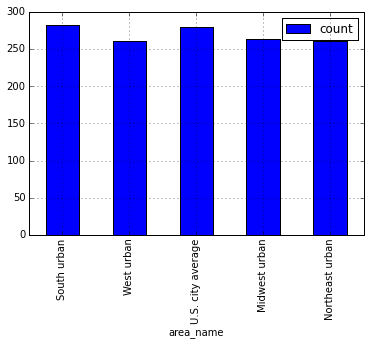

In [10]:
ppl.plot(kind="bar")

In [14]:
# lets graph peach prices over time in Midwest urban
mw_peaches = peaches[peaches.area_name == "Midwest urban"].filter(peaches.period_name != "Annual Average")


In [19]:
p = mw_peaches.toPandas()
p

,period_name,footnote_codes,item,item_name,area_name,area_code,period,value,series_id,period_abbr,year
0,January,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M01,0.000,APU0200711414,JAN,1980
1,February,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M02,0.000,APU0200711414,FEB,1980
2,March,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M03,0.000,APU0200711414,MAR,1980
3,April,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M04,0.000,APU0200711414,APR,1980
4,May,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M05,0.000,APU0200711414,MAY,1980
5,June,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M06,0.629,APU0200711414,JUN,1980
6,July,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M07,0.482,APU0200711414,JUL,1980
7,August,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M08,0.551,APU0200711414,AUG,1980
8,September,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M09,0.543,APU0200711414,SEP,1980
9,October,,711414,"Peaches, per lb. (453.6 gm)",Midwest urban,0200,M10,0.000,APU0200711414,OCT,1980


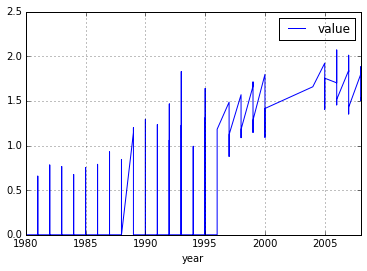

In [18]:
p.plot(x="year", y="value")

In [33]:
# aggregate peach prices per month, draw a vertical bar graph
ppm = mw_peaches.groupBy("period_name").avg("value").toPandas()

In [34]:
ppm

,period_name,AVG(value)
0,January,0.067294
1,July,0.904400
2,February,0.819696
3,December,0.000000
4,June,1.041917
5,November,0.000000
6,May,0.356611
7,August,0.893800
8,March,0.588773
9,April,0.000000


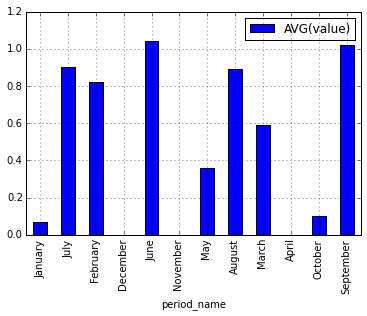

In [35]:
ppm.set_index("period_name").plot(kind="bar")